# Dan: I don't think this chart is useful. Use Workweek-Days-Only instead
This code finds the top X stations by total traffic for weekend days, and plots total traffic lines spanning the weekend on a single figure.

In [1]:
import numpy as np
import pandas as pd
from os.path import join, isfile
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark") #lolidk

In [2]:
## SET THESE VALUES TO CUSTOMIZE CHART AT END
number_of_stations = 15                                   # will get top X stations by total traffic
highlight_stations = ['TIMES SQ-42 ST', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ',
                      '34 ST-PENN STA', '23 ST', 'FULTON ST', '42 ST-PORT AUTH',
                     '125 ST', '86 ST', '14 ST-UNION SQ'] # PLEASE DOUBLE CHECK THIS -- SHOULD BE STATIONS NEAR
                      #                                                                   TECH OFFICES

In [3]:
dataframes = []

for filepath in [join('BensonData', f) for f in listdir('BensonData')]:
    new_df = pd.read_csv(filepath, index_col=0)
    dataframes.append(new_df)

df1 = pd.concat(dataframes)
df1.reset_index(inplace=True)

In [4]:
df2 = (df1[df1['DWEEKDAY'] >= 5].sort_values(by=['STATION', 'LINENAME'])
          .groupby(['STATION', 'LINENAME'])['TOTAL_TRAFFIC']
          .sum())

In [5]:
df2.sort_values(ascending=False, inplace=True)
df2[:number_of_stations]

STATION          LINENAME    
34 ST-HERALD SQ  BDFMNQRW        3658459.0
GRD CNTRL-42 ST  4567S           3362010.0
14 ST-UNION SQ   LNQR456W        2806958.0
42 ST-PORT AUTH  ACENQRS1237W    2792691.0
34 ST-PENN STA   ACE             2792318.0
TIMES SQ-42 ST   1237ACENQRSW    2416417.0
FLUSHING-MAIN    7               2177358.0
59 ST COLUMBUS   ABCD1           2079950.0
JKSN HT-ROOSVLT  EFMR7           2051054.0
CANAL ST         JNQRZ6W         1987372.0
BEDFORD AV       L               1855969.0
W 4 ST-WASH SQ   ABCDEFM         1855542.0
96 ST            123             1579062.0
86 ST            456             1532067.0
72 ST            123             1449957.0
Name: TOTAL_TRAFFIC, dtype: float64

In [6]:
df1.set_index(['STATION', 'LINENAME'], inplace=True)

In [7]:
topX_totaltraffic = df2[:number_of_stations]
stlntuples = topX_totaltraffic.index.tolist()
minidf1 = df1[(df1['DWEEKDAY'] >= 5)&(df1.index.isin(stlntuples))]

In [8]:
#df2[:10].plot.barh()

In [9]:
df_dweekday_means = (minidf1.sort_values(by=['STATION', 'LINENAME']).reset_index()
                    .groupby(['STATION', 'LINENAME', 'DWEEKDAY', 'DDATE']).sum().reset_index()
                    .groupby(['STATION', 'LINENAME', 'DWEEKDAY']).mean())

In [10]:
df_dweekday_means.reset_index(level=['DWEEKDAY'], inplace=True)
df_dweekday_means.head(7)

DWEEKDAY         index       ENTRIES  \
STATION         LINENAME                                             
14 ST-UNION SQ  LNQR456W             5  7.833651e+05  2.662302e+09   
                LNQR456W             6  7.797132e+05  2.653195e+09   
34 ST-HERALD SQ BDFMNQRW             5  2.270060e+07  3.400676e+10   
                BDFMNQRW             6  2.229817e+07  3.351051e+10   
34 ST-PENN STA  ACE                  5  1.731677e+07  1.001492e+10   
                ACE                  6  1.727678e+07  1.001365e+10   
42 ST-PORT AUTH ACENQRS1237W         5  1.248267e+07  4.516005e+10   

                                     EXITS      WEEKDAY   ENTRY_DIFFS  \
STATION         LINENAME                                                
14 ST-UNION SQ  LNQR456W      1.194853e+09   777.176471  43838.176471   
                LNQR456W      1.191236e+09   903.882353  40808.470588   
34 ST-HERALD SQ BDFMNQRW      4.416674e+10  1683.176471  62385.058824   
                BDFMNQRW      4.343075e+10  1649.647059  50311.058824   
34 ST-PENN STA  ACE           9.570830e+09  1729.647059  44108.588235   
                ACE           9.568010e+09  1718.823529  40214.117647   
42 ST-PORT AUTH ACENQRS1237W  3.695866e+10  1290.764706  46638.823529   

                                EXIT_DIFFS  TOTAL_TRAFFIC  
STATION         LINENAME                                   
14 ST-UNION SQ  LNQR456W      44180.647059   88018.823529  
                LNQR456W      36287.882353   77096.352941  
34 ST-HERALD SQ BDFMNQRW      63979.117647  120526.411765  
                BDFMNQRW      49154.352941   94677.058824  
34 ST-PENN STA  ACE           44528.058824   88636.647059  
                ACE           35403.235294   75617.352941  
42 ST-PORT AUTH ACENQRS1237W  42358.823529   86407.529412

In [11]:
# df_dweekday_means.loc[stlntuples[0][0], stlntuples[0][1]]

Text(0,0.5,'Average Traffic per Day')

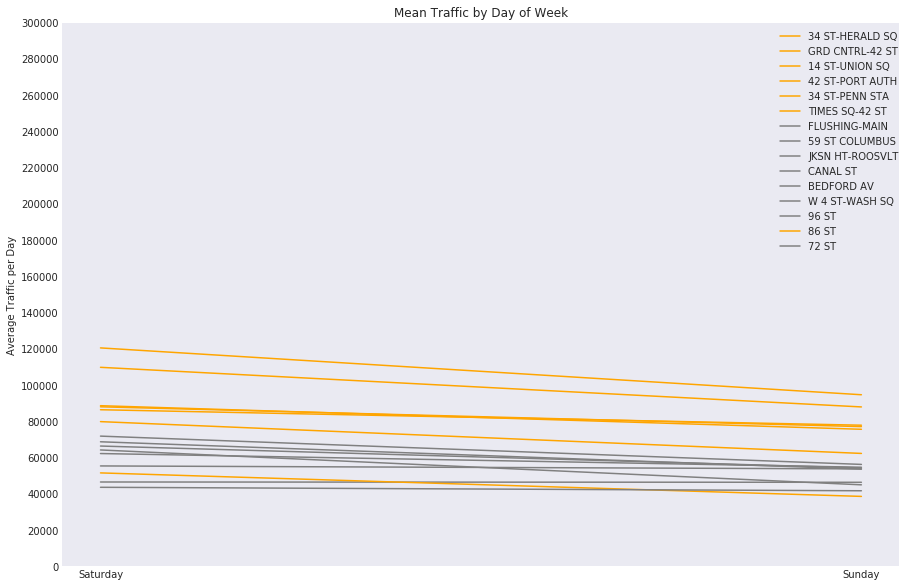

In [12]:
plt.figure(figsize=[15,10])
for stn, lnm in stlntuples:
    littleframe = df_dweekday_means.loc[stn, lnm]
    plt.plot(littleframe['DWEEKDAY']-5, littleframe['TOTAL_TRAFFIC'], label=stn,
            color='orange' if stn in highlight_stations else 'gray')


ticks_x =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.title("Mean Traffic by Day of Week")
plt.xticks(np.arange(0,2), ticks_x[5:])
plt.yticks(np.arange(0,320000, 20000))
plt.legend(bbox_to_anchor=(1.01,1))
plt.ylabel("Average Traffic per Day")